In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from ast import literal_eval
from numpy import nan
import xgboost
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
# from fancyimpute import KNN
# import missingno as msno
from copy import deepcopy
# import impyute.imputation.cs.mice as mice_imputation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score, explained_variance_score, median_absolute_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
import shap
from functools import partial



pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)

In [2]:
def mape(y_actual, y_pred):
    y_actual = y_actual[target].tolist()
    y_pred = [i if type(i) == list else i for i in y_pred.tolist()]
    return (np.sum([np.abs((i-j)/i) for i,j in zip(y_actual, y_pred)])*100)/len(y_actual)

def regression_report(y_true, y_pred):
    ev = explained_variance_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    try:
        msle = mean_squared_log_error(y_true, y_pred)
    except:
        msle = "error"
    medal = median_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    try:
        mape_score = mape(y_true, y_pred)
    except Exception as e:
        print(e)
        mape_score = None
    response = {
        "Explained Variance": ev,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "Mean Squared Log Error": msle,
        "Median Absolute Error": medal,
        "MAPE": mape_score,
        "r2_score": r2,
        "RMSE": mse**0.5
    }
    return response

In [3]:
county_df = pd.read_csv("us_county.csv")
target = 'cases'

In [4]:
county_data = county_df[county_df['county'].isin(['Los Angeles County', 'Ventura County'])]
pollution_lookup = {row['county'].replace('County', '').strip():row['population']  for index, row in county_data.iterrows()}
pollution_lookup

{'Los Angeles': 10098052, 'Ventura': 848112}

In [5]:
def cases_by_pop(row):
    county = row['county']
    population = pollution_lookup[county]
    cases = row['cases']/float(population)
    return cases*100
   
def deaths_by_pop(row):
    county = row['county']
    population = pollution_lookup[county]
    deaths = row['deaths']/float(population)
    return deaths*100

def get_each_day_cases(x):
    return [x[i]-x[i-1] if i!=0 else x[i] for i in range(0, len(x))]




O3_cdtw_betweenness
betweenness
float division by zero
Train 0.9049442000894917
float division by zero
Test 0.9138593192508044


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


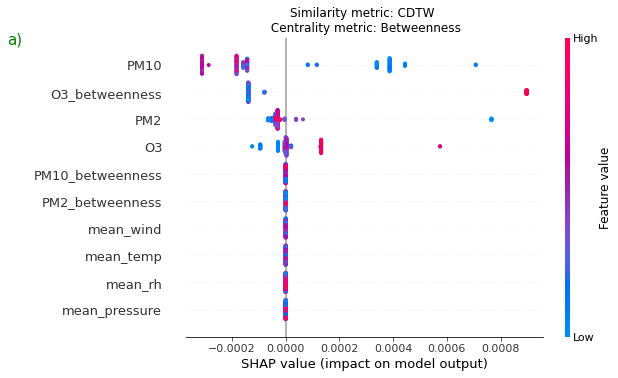

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)>
O3_cdtw_current_flow_betweenness
current_flow_betweenness
float division by zero
Train 0.9025133687748748
float division by zero
Test 0.8700532432215772


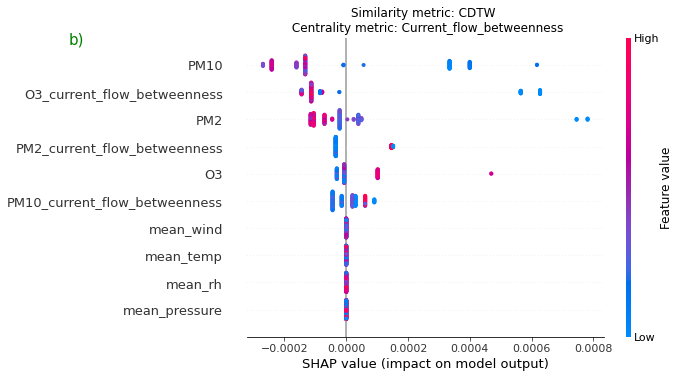

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)>
O3_cdtw_closeness
closeness
float division by zero
Train 0.8769244885721189
float division by zero
Test 0.6971669645540954


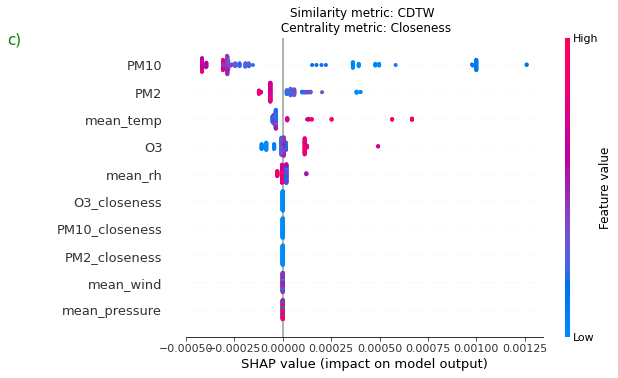

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)>
O3_cdtw_clustering
clustering
float division by zero
Train 0.8997933754192525
float division by zero
Test 0.9154440013576861


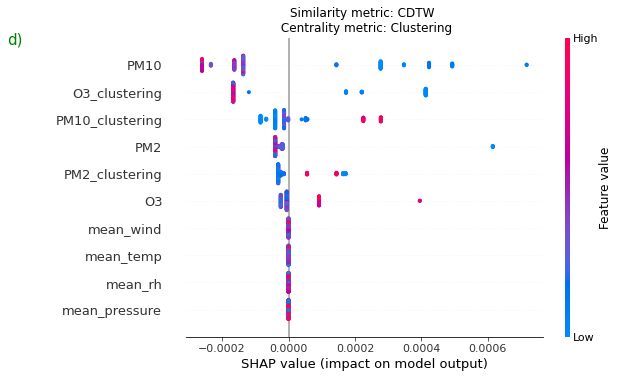

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)>
O3_cdtw_communicability_betweeness
communicability_betweeness
float division by zero
Train 0.9523468267737695
float division by zero
Test 0.947291328495363


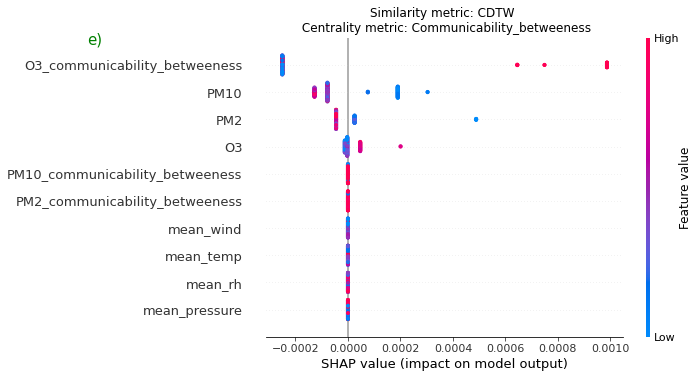

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)>
O3_cdtw_current_flow_closeness
current_flow_closeness
float division by zero
Train 0.8863748148136255
float division by zero
Test 0.7755816062874695


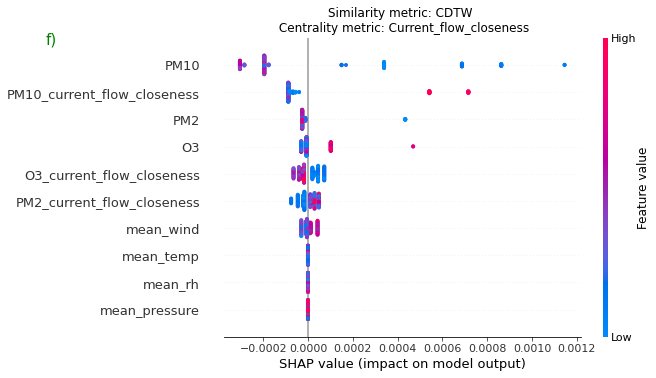

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)>
O3_cdtw_degree
degree
float division by zero
Train 0.8769244885721189
float division by zero
Test 0.6971669645540954


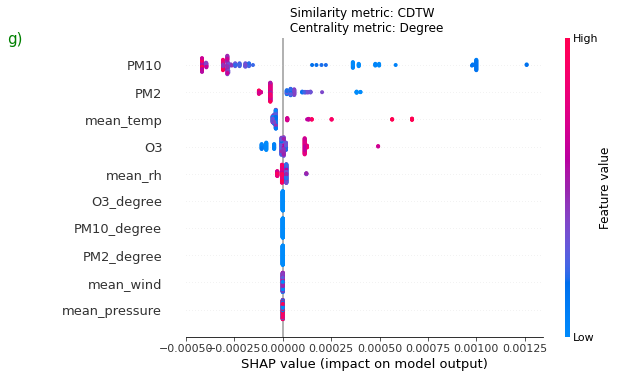

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)>
O3_cdtw_harmonic
harmonic
float division by zero
Train 0.9523468267737695
float division by zero
Test 0.947291328495363


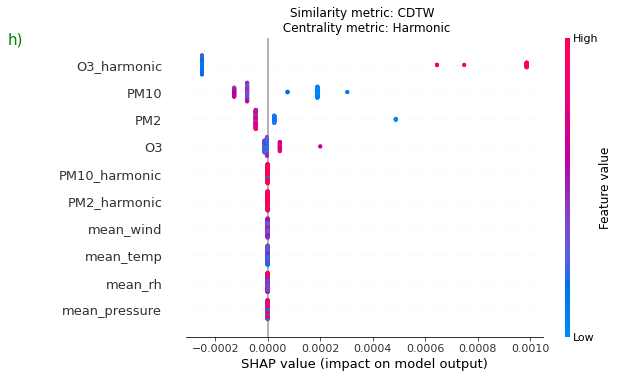

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)>
O3_cdtw_load
load
float division by zero
Train 0.9049442000894917
float division by zero
Test 0.9138593192508044


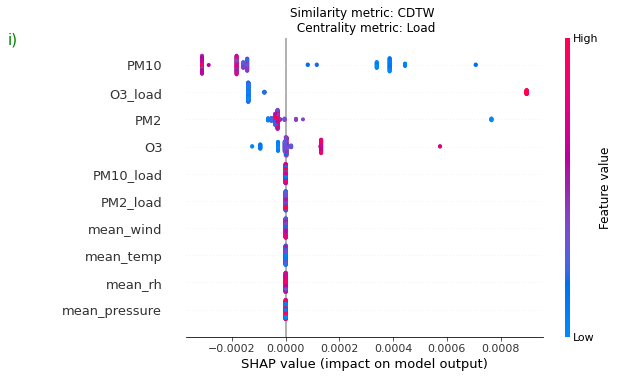

<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)>


Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


In [6]:
"""
'betweenness', 'closeness', 'clustering', 
'communicability_betweeness', 'current_flow_betweenness', 
'current_flow_closeness', 'degree', 'harmonic', 
'load'
'dayofweek','dayofyear',

euclidian_simlarity
"""
sa = 32
label = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)']
for idx, cen in enumerate(['betweenness', 'current_flow_betweenness', 'closeness', 'clustering', 'communicability_betweeness',  'current_flow_closeness', 
            'degree', 'harmonic', 'load']):
    df = pd.read_csv("network_analysis_final_file.csv")

    df['cases'] = df.groupby('county')['cases'].transform(lambda x: get_each_day_cases(x.tolist()))
    df['cases'] = df.groupby('county')['cases'].transform(lambda x: x.rolling(7).mean())
    df['cases'] = df['cases'].fillna(0)

    # df['deaths'] = df.groupby('county')['deaths'].transform(lambda x: get_each_day_cases(x.tolist()))
    # df['deaths'] = df.groupby('county')['deaths'].transform(lambda x: x.rolling(7).mean())
    # df['deaths'] = df['deaths'].fillna(0)


    df['cases'] = df.apply(cases_by_pop, axis=1)
    df['deaths'] = df.apply(deaths_by_pop, axis=1)
    
    pollutant =  ["PM2", "PM10", "O3"]
    #  "current_flow_betweenness", "communicability_betweeness"
    centrality = [cen]
    metric = ["cdtw"]
    replace_map = {
        'cdtw': 'CDTW'
    }
    a = ["{}_{}".format(j, i) for j in metric for i in centrality]
    # a = a+[ ]
    headers = ["{}_{}".format(j, i) for j in pollutant for i in a]
    mandetory = [  'cases', 'deaths',
            'mean_pressure', 'mean_rh', 'mean_temp', 'mean_wind']
    headers = mandetory+headers
    total_head = pollutant+ headers
    
    for head in total_head:
        if any(df[head].isna()):
            print(head)
            df[head] = df[head].interpolate()
    df = df[total_head]

    X = df.drop(['cases', 'deaths'], axis=1)
    y = df[[target]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

    model = XGBRegressor()
    model.fit(X_train, y_train) 

    Y_pred=model.predict(X_test)
    Y_pred_train=model.predict(X_train)
    print(cen)
    print('Train', regression_report(y_train, Y_pred_train).get('r2_score'))
    print('Test', regression_report(y_test, Y_pred).get('r2_score'))

    X.columns = [i.replace('{}_'.format(metric[0]), '') for i in X.columns]

    explained = shap.TreeExplainer(model)
    shap_values = explained.shap_values(X)

    f = plt.figure()
    ax = plt.gca()
    ax.text(-0.5, 0.98, label[idx], transform=ax.transAxes, size=15, color='green')
    met = replace_map.get(metric[0], metric[0])
    ax.set_title('Similarity metric: {} \n Centrality metric: {}'.format(met.upper(), cen.capitalize()))
    shap.summary_plot(shap_values, X, max_display=10)
    f.savefig("images/SA{}_{}_{}.png".format(idx+sa, met, cen), bbox_inches='tight', dpi=600)
    f.show()
    print(model.get_params)
